In [1]:
# Basic Deterministic Methods
def count_sarw(L, pos=(0, 0), visited=None):
    if visited is None:
        visited = set()
    
    if L == 0:
        return 1
    
    visited.add(pos)
    
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    count = 0
    
    for dx, dy in moves:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos not in visited:
            count += count_sarw(L - 1, new_pos, visited.copy())
    
    return count

L = 2  # Example saw length
print(count_sarw(L))

12


0.189928
[0.04209, 0.028669, 0.019547, 0.013095, 0.008871, 0.006048, 0.00398, 0.002715, 0.00183, 0.001194, 0.000827, 0.00054, 0.000372, 0.000211, 0.000165, 0.000152, 7.9e-05, 3.5e-05, 4.4e-05, 1.7e-05, 1.7e-05, 9e-06, 1.1e-05, 2e-06, 1e-06, 1e-06, 1e-06, 0.0, 0.0, 0.0, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


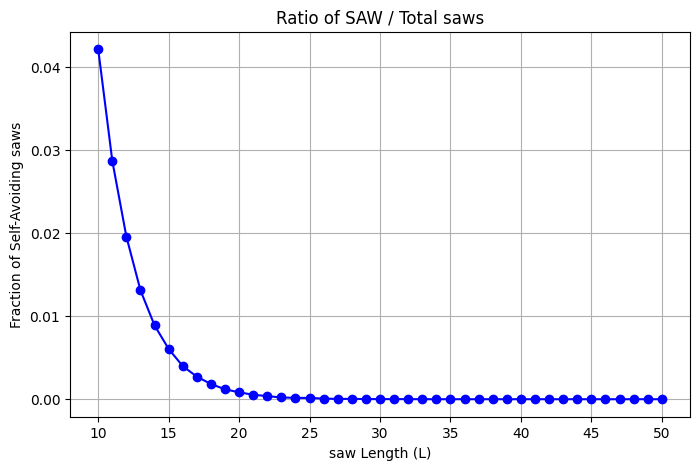

[2.9139217418710865, 2.8961747849822754, 2.881708189578424, 2.8656421275658146, 2.8542144738187667, 2.8455580091018406, 2.831735486726161, 2.825564826348044, 2.818213823149839, 2.8068429523077914, 2.8050155088828306, 2.795501271811141, 2.7936730579580322, 2.7685105641116774, 2.782628030731656, 2.814062474147017, 2.7814830510623114, 2.735429173925884, 2.7955612726145223, 2.7390042917728255, 2.7737987964008917, 2.7497525955861186, 2.7996485276377125, 2.6875956567966885, 2.6643385163236633, 2.695450867212378, 2.725168276231845, 0.0, 0.0, 0.0, 2.8317831375365516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


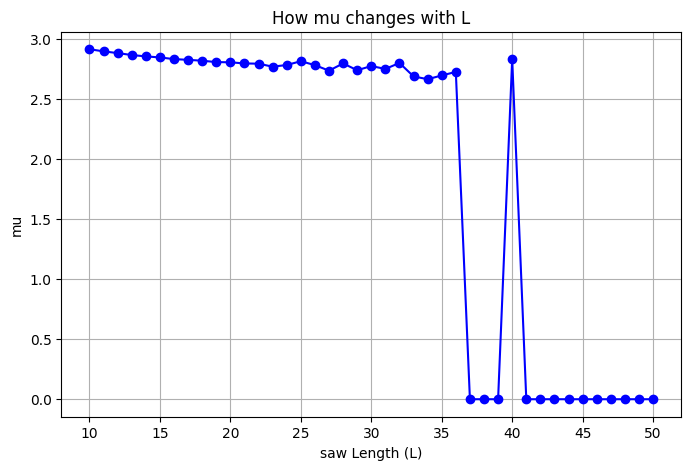

[1.0, 1.0, 0.749685, 0.562374, 0.389078, 0.277353, 0.189722, 0.132477, 0.089837, 0.062033, 0.041802]
[1.0, 4.0, 11.99496, 35.991936, 99.603968, 284.009472, 777.101312, 2170.503168, 5887.557632, 16261.578752, 43832.573952]


In [2]:
# Basic Monte Carlo I
import random
import matplotlib.pyplot as plt

def random_saw(L):
    pos = (0, 0)
    visited = {pos}
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Up, Right, Down, Left
    
    for _ in range(L):
        dx, dy = random.choice(moves)
        new_pos = (pos[0] + dx, pos[1] + dy)
        if new_pos in visited:
            return False  # Not a self-avoiding saw
        visited.add(new_pos)
        pos = new_pos
    
    return True  # Self-avoiding saw

def estimate_sarw_fraction(L, trials=1000000):
    count_sarw = sum(random_saw(L) for _ in range(trials))
    return count_sarw / trials

L = 6  # Example saw length
trials = 1000000  # Number of trials
print(estimate_sarw_fraction(L, trials))

# Plot SAW / total saw ratio for L = 10 to 50
L_values = range(10, 51)
ratios = [estimate_sarw_fraction(L, trials) for L in L_values]
print(ratios)


plt.figure(figsize=(8, 5))
plt.plot(L_values, ratios, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('Fraction of Self-Avoiding saws')
plt.title('Ratio of SAW / Total saws')
plt.grid()
plt.show()

#Values of mu as L increases
mu = []
L_values = range(10, 51)
for i, r in enumerate(ratios):
    mu.append(4 * r**(1/L_values[i]))

print(mu)

# Plot value of mu for L = 10 to 50

plt.figure(figsize=(8, 5))
plt.plot(L_values, mu, marker='o', linestyle='-', color='b')
plt.xlabel('saw Length (L)')
plt.ylabel('mu')
plt.title('How mu changes with L')
plt.grid()
plt.show()

#cL when L = 0 to 10
small_L_values = range(0, 11)
small_ratios = [estimate_sarw_fraction(L, trials) for L in small_L_values]
print(small_ratios)
cL = []
for i, r in enumerate(small_ratios):
    cL.append(4**small_L_values[i] * r)
print(cL)